In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [2]:
shopping_nouns = pd.read_csv(r'C:\Users\NT550\asac\SIH\SIH\code2\result\shopping_nouns.csv')
len(shopping_nouns)

57141

In [3]:
# Î¶¨Î∑∞ Ï∂úÎ†•Ïãú ... ÏóÜÏù¥ Ï†ÑÎ∂Ä ÎÇòÏò§Í≤å ÏÑ§Ï†ï
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [4]:
shopping_data = pd.read_csv(r"C:\Users\NT550\asac\SIH\SIH\code2\result\naver_shopping_preprocess.csv", index_col=0)
shopping_data.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                  Ï†úÌíàÎ™Ö      Í∞ÄÍ≤©  ÌèâÍ∑†ÌèâÏ†ê  \
0  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
1  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
2  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
3  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
4  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   

           ÏïÑÏù¥Îîî   ÌèâÏ†ê         ÎÇ†Ïßú  \
0  miri*******  5.0  23.08.16.   
1    dltm*****  5.0  23.07.28.   
2     yjdr****  5.0  23.08.06.   
3      2133***  5.0  23.07.13.   
4     klys****  5.0  23.08.12.   

                                                Ï¢ÖÎ•ò                       ÏöîÏïΩ  \
0  30Ìè¨ ÏÑ†ÌÉù1: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
1           30Ìè¨ ÏÑ†ÌÉù1: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù2: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù3: Î∞§\n   Ïú†ÌÜµÍ∏∞ÌïúÍΩ§ ÎÇ®ÏïòÏñ¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
2    30Ìè¨ ÏÑ†ÌÉù1: Ïò¨Ïù∏Ïõê / 30Ìè¨ ÏÑ†ÌÉù2: Ïò¨Ïù∏Ïõê / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n   Ïú†ÌÜµÍ∏∞ÌïúÍΩ§ ÎÇ®ÏïòÏñ¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
3       30Ìè¨ ÏÑ†ÌÉù1: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïºÏÉùÌôî / 30Ìè¨ ÏÑ†ÌÉù3: Ïò¨Ïù∏Ïõê\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
4      30Ìè¨ ÏÑ†ÌÉù1: ÏïºÏÉùÌôî / 30Ìè¨ ÏÑ†ÌÉù2: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   

                                                                                                                                                                                                                                     Î¶¨Î∑∞  \
0                                                                                                                                                        ÌïúÎã¨ÏÇ¨Ïö©Í∏∞Ïû¨Íµ¨Îß§Î®πÍ∏∞ Ìé∏ÌïòÍ≥† ÌíàÏßàÎèÑ Ï¢ãÏïÑÏöî. Î∞õÎäî ÏÜêÎãòÎèÑ Ï¢ãÏïÑ ÌïòÏãúÍ≥† Íµ¨Îß§Îì±Í∏âÎèÑ Îî∞Î°ú ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Î¨∏Ï†ú ÏÉùÍ∏∞Î©¥ Î∞îÎ°ú Ï≤òÎ¶¨ Ìï¥Ï£ºÏãúÍ≥† Ï¢ãÏïÑÏöî!   
1                                                                      Í∞ÑÌé∏ÌïòÍ≤å ÌïòÎ£®ÌïúÌè¨Ïî©Î®πÍ≤åÎêòÏöî~ÎÉâÏû•Ïù¥ÎÇò ÎÉâÎèôÏúºÎ°ú Ìï¥ÏÑú ÏãúÏõêÌïòÍ≤å Î®πÏúºÎãà ÎßõÏûáÏñ¥Ïöî!!Î∞§ÍøÄÏù¥ ÎßéÏù¥ Ïì∏Ï§ÑÏïåÏïóÎäîÎç∞ Ïì¥Í±¥ Ïûò ÏïàÎ®πÎäîÌé∏Ïù¥Í∏∞ÎèÑ ÌïòÍµ¨Ïöî  ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßÑÌïòÎãà Î®πÏùÑÎßåÌñàÏñ¥Ïöî ÏöîÏ¶ò Î©¥Ïó≠Ïù¥ ÎßéÏù¥ Îñ®Ïñ¥ÏßÄÍ∏∞ÎèÑ ÌñàÍ≥† Í≤∏ÏÇ¨Í≤∏ÏÇ¨ Íµ¨Îß§ÌñàÎäîÎç∞ ÎßàÏùåÏóêÎì§Ïñ¥ÏÑú Îã§ÏùåÏóê Ïû¨Íµ¨Îß§Ìï¥ÏïºÍ≤†Ïñ¥Ïöî! ÏÑ†Î¨ºÏö©ÏúºÎ°úÎèÑ ÎÑàÎ¨¥ Ï¢ãÏùÑÍ±∞ Í∞ôÏïÑÏöî!   
2                                                                                                     ÌôçÏÇºÏù¥ Ïó¨ÏûêÎ™∏Ïóê ÏïàÏ¢ãÎã§Í≥†Ìï¥ÏÑú.. Í∑∏ÎèôÏïà ÏïàÎ®πÎã§Í∞Ä ÍøÄ Ïä§Ìã± Î≥¥Í≥† Ï£ºÎ¨∏ÌñàÏäµÎãàÎã§\nÎãπÎñ®Ïñ¥ÏßÄÍ∏∞Ï†ÑÏóê Î®πÏúºÎ©¥ Ï¢ãÍµ¨Ïöî Î∞ñÏóêÏÑúÎèÑ ÏâΩÍ≤å Î®πÏùÑÏàòÏûàÏñ¥Ïöî. Ïù¥ÏßÄÏª∑Ïù¥ Ïûò ÎúØÏñ¥ÏßëÎãàÎã§.\nÏ∫°ÏäêÏª§Ìîº ÎÇ¥Î†§Î®πÏùÑÎïå ÎÑ£Ïñ¥Î®πÏùÑÏàòÎèÑ ÏûàÎÑ§Ïöî\nÎã§Î®πÏúºÎ©¥ Îòê Ï£ºÎ¨∏ÌïòÎ†§Íµ¨Ïöî „Öé„Öé   
3  BESTÍøÄÏù¥ ÌîºÎ°ú ÌöåÎ≥µ, Í∏∞Í¥ÄÏßÄÏóê Ï¢ãÎã§Í≥† ÌïòÎäîÎç∞ ÏÇ¨Ïã§ Ïñ¥ÎäêÏ†ïÎèÑÍ∞Ä Ï†ÅÎãπÌïúÏßÄ, ÎÑàÎ¨¥ ÎßéÏù¥ Î®πÏúºÎ©¥ ÏïàÏ¢ãÏùÄ Í±¥ ÏïÑÎãåÏßÄ Í≥†ÎØºÎêòÎçîÎùºÍµ¨Ïöî„Ö†\nÌäπÌûà Î∂ÄÎ™®ÎãòÍªò ÏÑ†Î¨ºÌï† Í±¥Îç∞ ÍøÄ ÎßéÏù¥ ÎìúÏÖîÏÑú Îãπ ÏàòÏπòÍ∞Ä Ïò¨ÎùºÍ∞àÍπåÎ¥ê Í±±Ï†ïÎê¨ÏóàÎäîÎç∞ ÏÜåÎüâÏúºÎ°ú Î®πÍ∏∞ Ï¢ãÍ≤å Ïä§Ìã± Ìè¨Ïû• ÎêòÏñ¥ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî !\nÎ≥ëÏóê Îã¥Í∏¥ ÍøÄÏùÄ Îß§Ïùº Í∫ºÎÇ¥ÏÑú Îñ†Î®πÍ∏∞Í∞Ä Î∂àÌé∏ÌïòÍ≥† Ï†ÅÏ†ïÎüâÏùÑ Î®πÎäîÍ±¥ÏßÄ

In [5]:
len(shopping_data['Ï†úÌíàÎ™Ö'].unique())

147

In [6]:
""" gift_reviews = shopping_data[shopping_data['Î¶¨Î∑∞'].str.contains('ÏÑ†Î¨º')]

gift_reviews.head() """

" gift_reviews = shopping_data[shopping_data['Î¶¨Î∑∞'].str.contains('ÏÑ†Î¨º')]\n\ngift_reviews.head() "

In [7]:
shopping_data['cleaned_tokens'].dropna(inplace=True)

In [8]:
def kw_in_df(keyword):
    print("'", keyword, "' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù", len(shopping_nouns[shopping_nouns['Î¶¨Î∑∞'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']),'Í±¥')
    return shopping_nouns[shopping_nouns['Î¶¨Î∑∞'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']

In [9]:
shopping_data.loc[57012]

Unnamed: 0.1                                                                                                                                                                                                                                                                                                                  57012
Unnamed: 0                                                                                                                                                                                                                                                                                                                      705
Ï†úÌíàÎ™Ö                                                                                                                                                                                                                                                                                    ÎπÑÌÅ¨Î°úÌîÑÌä∏ ÎßàÎàÑÏπ¥ÍøÄ ÍøÄÏä§Ìã± MGO300+100Ïä§Ìã± [ÏõêÏÇ∞ÏßÄ:

In [10]:
def kw_in_nouns(keyword):
    print("'", keyword, "' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù", len(shopping_nouns[shopping_nouns['cleaned_tokens'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']),'Í±¥')
    return shopping_nouns[shopping_nouns['cleaned_tokens'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']

In [11]:
#ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ìï®Ïàò
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/ÏûáÎçî/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = r'C:\Users\NT550\asac\SIH\SIH\Kurly\NanumBarunGothic.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [12]:
shopping_nouns.dropna(subset=['Î¶¨Î∑∞'], inplace=True)
shopping_nouns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55796 entries, 0 to 57140
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  55796 non-null  int64  
 1   Unnamed: 0    55796 non-null  int64  
 2   Ï†úÌíàÎ™Ö           55796 non-null  object 
 3   Í∞ÄÍ≤©            55796 non-null  object 
 4   ÌèâÍ∑†ÌèâÏ†ê          51760 non-null  float64
 5   ÏïÑÏù¥Îîî           55796 non-null  object 
 6   ÌèâÏ†ê            55796 non-null  float64
 7   ÎÇ†Ïßú            55796 non-null  object 
 8   Ï¢ÖÎ•ò            54441 non-null  object 
 9   ÏöîÏïΩ            55796 non-null  object 
 10  Î¶¨Î∑∞            55796 non-null  object 
 11  ko_review     55763 non-null  object 
 12  token_nouns   55796 non-null  object 
 13  token         55796 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 6.4+ MB


In [14]:
shopping_nouns['token_nouns'].info()

<class 'pandas.core.series.Series'>
Int64Index: 55796 entries, 0 to 57140
Series name: token_nouns
Non-Null Count  Dtype 
--------------  ----- 
55796 non-null  object
dtypes: object(1)
memory usage: 871.8+ KB


In [15]:
def wc_kw(kw_option, keyword):
    if kw_option == 1: # 1ÏùÄ Î™ÖÏÇ¨ ÌÇ§ÏõåÎìú
        return wc_analysis(shopping_nouns[shopping_nouns['Î¶¨Î∑∞'].apply(lambda x:keyword in x)]['token_nouns'])
    else:
        return print('ÏòµÏÖò ÌôïÏù∏')

In [16]:
""" # Ï§ëÎ≥µÏ†úÍ±∞
shopping_nouns.drop_duplicates(['Î¶¨Î∑∞']) """

" # Ï§ëÎ≥µÏ†úÍ±∞\nshopping_nouns.drop_duplicates(['Î¶¨Î∑∞']) "

In [17]:
shopping_nouns.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                  Ï†úÌíàÎ™Ö      Í∞ÄÍ≤©  ÌèâÍ∑†ÌèâÏ†ê  \
0  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
1  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
2  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
3  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
4  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   

           ÏïÑÏù¥Îîî   ÌèâÏ†ê         ÎÇ†Ïßú  \
0  miri*******  5.0  23.08.16.   
1    dltm*****  5.0  23.07.28.   
2     yjdr****  5.0  23.08.06.   
3      2133***  5.0  23.07.13.   
4     klys****  5.0  23.08.12.   

                                                Ï¢ÖÎ•ò                       ÏöîÏïΩ  \
0  30Ìè¨ ÏÑ†ÌÉù1: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
1           30Ìè¨ ÏÑ†ÌÉù1: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù2: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù3: Î∞§\n   Ïú†ÌÜµÍ∏∞ÌïúÍΩ§ ÎÇ®ÏïòÏñ¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
2    30Ìè¨ ÏÑ†ÌÉù1: Ïò¨Ïù∏Ïõê / 30Ìè¨ ÏÑ†ÌÉù2: Ïò¨Ïù∏Ïõê / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n   Ïú†ÌÜµÍ∏∞ÌïúÍΩ§ ÎÇ®ÏïòÏñ¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
3       30Ìè¨ ÏÑ†ÌÉù1: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïºÏÉùÌôî / 30Ìè¨ ÏÑ†ÌÉù3: Ïò¨Ïù∏Ïõê\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
4      30Ìè¨ ÏÑ†ÌÉù1: ÏïºÏÉùÌôî / 30Ìè¨ ÏÑ†ÌÉù2: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   

                                                                                                                                                                                                                                     Î¶¨Î∑∞  \
0                                                                                                                                                        ÌïúÎã¨ÏÇ¨Ïö©Í∏∞Ïû¨Íµ¨Îß§Î®πÍ∏∞ Ìé∏ÌïòÍ≥† ÌíàÏßàÎèÑ Ï¢ãÏïÑÏöî. Î∞õÎäî ÏÜêÎãòÎèÑ Ï¢ãÏïÑ ÌïòÏãúÍ≥† Íµ¨Îß§Îì±Í∏âÎèÑ Îî∞Î°ú ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Î¨∏Ï†ú ÏÉùÍ∏∞Î©¥ Î∞îÎ°ú Ï≤òÎ¶¨ Ìï¥Ï£ºÏãúÍ≥† Ï¢ãÏïÑÏöî!   
1                                                                      Í∞ÑÌé∏ÌïòÍ≤å ÌïòÎ£®ÌïúÌè¨Ïî©Î®πÍ≤åÎêòÏöî~ÎÉâÏû•Ïù¥ÎÇò ÎÉâÎèôÏúºÎ°ú Ìï¥ÏÑú ÏãúÏõêÌïòÍ≤å Î®πÏúºÎãà ÎßõÏûáÏñ¥Ïöî!!Î∞§ÍøÄÏù¥ ÎßéÏù¥ Ïì∏Ï§ÑÏïåÏïóÎäîÎç∞ Ïì¥Í±¥ Ïûò ÏïàÎ®πÎäîÌé∏Ïù¥Í∏∞ÎèÑ ÌïòÍµ¨Ïöî  ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßÑÌïòÎãà Î®πÏùÑÎßåÌñàÏñ¥Ïöî ÏöîÏ¶ò Î©¥Ïó≠Ïù¥ ÎßéÏù¥ Îñ®Ïñ¥ÏßÄÍ∏∞ÎèÑ ÌñàÍ≥† Í≤∏ÏÇ¨Í≤∏ÏÇ¨ Íµ¨Îß§ÌñàÎäîÎç∞ ÎßàÏùåÏóêÎì§Ïñ¥ÏÑú Îã§ÏùåÏóê Ïû¨Íµ¨Îß§Ìï¥ÏïºÍ≤†Ïñ¥Ïöî! ÏÑ†Î¨ºÏö©ÏúºÎ°úÎèÑ ÎÑàÎ¨¥ Ï¢ãÏùÑÍ±∞ Í∞ôÏïÑÏöî!   
2                                                                                                     ÌôçÏÇºÏù¥ Ïó¨ÏûêÎ™∏Ïóê ÏïàÏ¢ãÎã§Í≥†Ìï¥ÏÑú.. Í∑∏ÎèôÏïà ÏïàÎ®πÎã§Í∞Ä ÍøÄ Ïä§Ìã± Î≥¥Í≥† Ï£ºÎ¨∏ÌñàÏäµÎãàÎã§\nÎãπÎñ®Ïñ¥ÏßÄÍ∏∞Ï†ÑÏóê Î®πÏúºÎ©¥ Ï¢ãÍµ¨Ïöî Î∞ñÏóêÏÑúÎèÑ ÏâΩÍ≤å Î®πÏùÑÏàòÏûàÏñ¥Ïöî. Ïù¥ÏßÄÏª∑Ïù¥ Ïûò ÎúØÏñ¥ÏßëÎãàÎã§.\nÏ∫°ÏäêÏª§Ìîº ÎÇ¥Î†§Î®πÏùÑÎïå ÎÑ£Ïñ¥Î®πÏùÑÏàòÎèÑ ÏûàÎÑ§Ïöî\nÎã§Î®πÏúºÎ©¥ Îòê Ï£ºÎ¨∏ÌïòÎ†§Íµ¨Ïöî „Öé„Öé   
3  BESTÍøÄÏù¥ ÌîºÎ°ú ÌöåÎ≥µ, Í∏∞Í¥ÄÏßÄÏóê Ï¢ãÎã§Í≥† ÌïòÎäîÎç∞ ÏÇ¨Ïã§ Ïñ¥ÎäêÏ†ïÎèÑÍ∞Ä Ï†ÅÎãπÌïúÏßÄ, ÎÑàÎ¨¥ ÎßéÏù¥ Î®πÏúºÎ©¥ ÏïàÏ¢ãÏùÄ Í±¥ ÏïÑÎãåÏßÄ Í≥†ÎØºÎêòÎçîÎùºÍµ¨Ïöî„Ö†\nÌäπÌûà Î∂ÄÎ™®ÎãòÍªò ÏÑ†Î¨ºÌï† Í±¥Îç∞ ÍøÄ ÎßéÏù¥ ÎìúÏÖîÏÑú Îãπ ÏàòÏπòÍ∞Ä Ïò¨ÎùºÍ∞àÍπåÎ¥ê Í±±Ï†ïÎê¨ÏóàÎäîÎç∞ ÏÜåÎüâÏúºÎ°ú Î®πÍ∏∞ Ï¢ãÍ≤å Ïä§Ìã± Ìè¨Ïû• ÎêòÏñ¥ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî !\nÎ≥ëÏóê Îã¥Í∏¥ ÍøÄÏùÄ Îß§Ïùº Í∫ºÎÇ¥ÏÑú Îñ†Î®πÍ∏∞Í∞Ä Î∂àÌé∏ÌïòÍ≥† Ï†ÅÏ†ïÎüâÏùÑ Î®πÎäîÍ±¥ÏßÄ

In [18]:
shopping_nouns['token_nouns'] = shopping_nouns['token_nouns'].apply(lambda x: eval(x))
shopping_nouns['token'] = shopping_nouns['token'].apply(lambda x: eval(x))

In [ ]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

# Ï†úÌíàÎ¶¨Î∑∞Î≥Ñ ÌÇ§ÏõåÎìú ÎπÑÏú® ÌååÏïÖ

### Î™ÖÏÇ¨ Î∂ÑÏÑù

In [ ]:
frequency_analysis(shopping_nouns['token_nouns'], 500)

Token  Frequency
0      ÏÑ†Î¨º      13163
1       ÍøÄ      12400
2      Ìè¨Ïû•       9174
3       Îßõ       8679
4      Íµ¨Îß§       8624
..    ...        ...
495    ÏÜåÍ∞ú         49
496   Í∞ÄÍ≤©ÎåÄ         49
497    Í∑∏Í≤É         49
498    Í±∞Í∏∞         49
499    ÏûòÏïà         48

[500 rows x 2 columns]

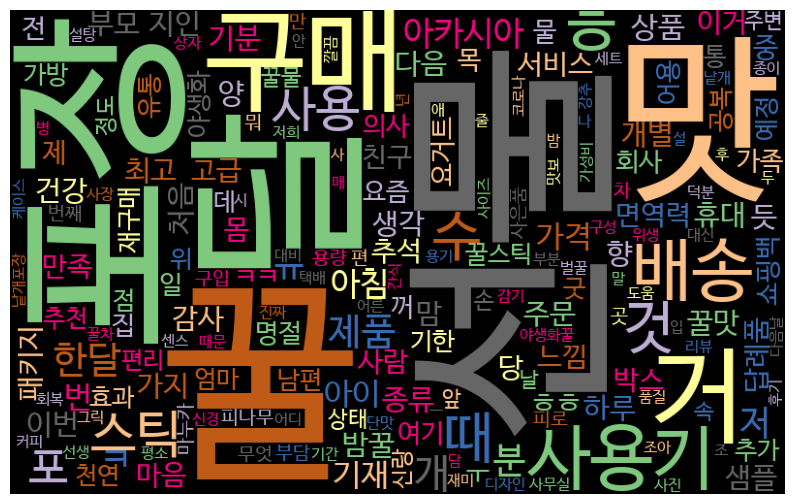

In [19]:
wc_analysis(shopping_nouns['token_nouns'])

In [20]:
kw_in_nouns('Ïñë')

KeyError: 'cleaned_tokens'

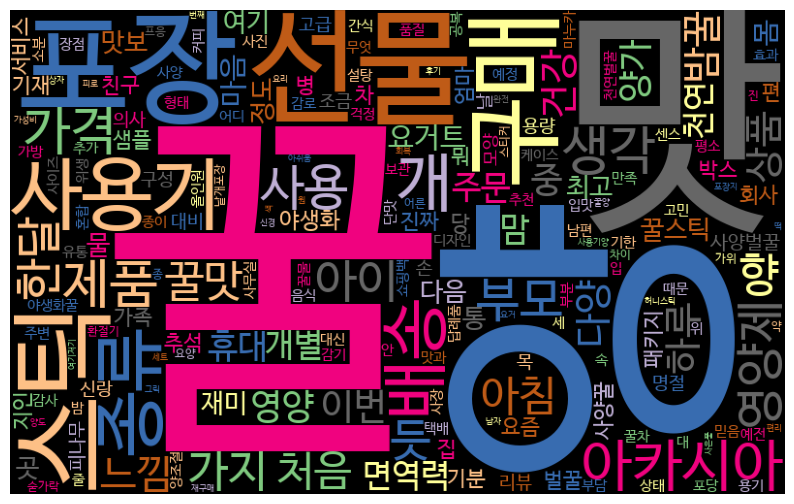

In [ ]:
wc_kw(1, 'Ïñë')

Ìå®ÌÇ§ÏßÄ: Ïù¥ÏÅòÍ≤å, ÍπîÎÅîÌïòÍ≤å, Í≥†Í∏âÏä§ÎüΩÍ≤å
Î∏åÎûúÎî©(Ï†úÏ£º, Í±¥Í∞ï): Ï†úÏ£ºÎ•º Îã¥ÏùÄ Í±¥Í∞ïÌïòÍ≥† Í≥†Í∏â, ÍπîÎÅîÌïú Ìè¨Ïû•Ïóê ÍøÄ Ïä§Ìã± Î∏åÎûúÎî©ÌïòÎ©¥ Ï¢ãÏùÑ ÎìØ
Ï≤®Í∞ÄÎ¨º:
Î†àÏãúÌîº: ÍøÄÎ¨º, Í∑∏Î¶≠ÏöîÍ±∞Ìä∏, Í∞ÅÏ¢Ö Ï∞®(Ïë•Ï∞®, Ï∫êÎ™®ÎßàÏùº), ÌôçÏÇº

ÍøÄ ÏÑ†Î¨ºÏùÄ Ïô†ÏßÄ Ïò¨ÎìúÌï¥Î≥¥ÏòÄÎäîÎç∞ ÏõåÏª§ÎπÑ ÎßåÎÇòÍ≥† Ìé∏Í≤¨Ïù¥ Ïãπ ÏÇ¨ÎùºÏ°åÏñ¥Ïöî Ïä§Ìã±ÌòïÏù¥Îùº Í∞ÑÌé∏ÌïòÍ≤å ÍøÄÏ∞®Î•º ÎßàÏã§Ïàò ÏûàÍ≥† Ìå®ÌÇ§ÏßÄÎì§Ïù¥ ÌïòÎÇòÍ∞ôÏù¥ Í∞êÏÑ±ÌÑ∞ÏßëÎãàÎã§!! 

ÏÑ†Î¨ºÏö©ÏúºÎ°ú ÏÉÄÎäîÎç∞ ÏáºÌïëÎ∞±ÎèÑ ÏÉâÏÉÅÏù¥ ÎÑò Ïù¥ÏÅòÎÑ§Ïöî. Ï∫êÎ¶≠ÌÑ∞Í∞Ä Í∑ÄÏó¨Ïõå Î≥¥ÎäîÏÇ¨ÎûåÎèÑ Í∞ôÏù¥ Í∏∞Î∂ÑÏù¥ Ï¢ãÏïÑ ÏßëÎãàÎã§.

In [ ]:
# Ìè¨Ïû•
package_kw = ['Ìå®ÌÇ§ÏßÄ', 'Ìè¨Ïû•', 'ÏáºÌïëÎ∞±', 'ÎîîÏûêÏù∏', 'Ìå®ÌÇ§Ïßï', 'Í≥†Í∏â', 'Ìå®ÌÇ§', 'Î≥¥ÌãÄ', 'ÏºÄÏù¥Ïä§', 'ÌÇ§Ìä∏', 'Ïö©Í∏∞', 'ÏÉâÍ∞ê', 'Ìè¨Ïû•ÏßÄ', 'Î≥¥ÏûêÍ∏∞', 'Ï∫î', 'Ïä§Ìã∞Ïª§']

### ÎùºÎ≤®ÎßÅ
- Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥ ÎùºÎ≤®ÎßÅ ÏßÑÌñâ

In [ ]:
shopping_all = pd.read_excel(r'C:\Users\NT550\asac\SIH\SIH\code2\result\ÏáºÌïë_Î™ÖÏÇ¨_all.xlsx')
shopping_all.head()

In [ ]:
from collections import defaultdict

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ Í∑∏Î£πÌôî
similar_words = {
    'Í≥†Í∏â' : ['Í≥†Í∏â','Ïö∞ÏïÑ','ÌíàÏúÑ','Îü≠ÏÖîÎ¶¨','Í≥†ÌÄÑ','ÏÑ∏Î†®'],
    'ÏòàÏÅ®' : ['ÏòàÏÅò','Ïù¥ÏÅò','ÏòàÏÅ®','Ïù¥ÏÅ®','Ïù¥Îøå','ÏòàÎøå','ÏïÑÎ¶ÑÎã§'],
    'ÍπîÎÅî' : ['ÍπîÎÅî','Ïã¨Ìîå','Ï†ïÍ∞à','Ï†ïÎèà']
}

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ÏùÑ Í∑∏Î£πÌôîÌïòÍ≥† ÎπàÎèÑÏàò Ìï©ÏÇ∞
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['Îã®Ïñ¥']
    frequency = row['ÎπàÎèÑÏàò']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # Í∑∏Î£πÏóê ÏÜçÌïú Í≤ΩÏö∞ Î£®ÌîÑ Ï¢ÖÎ£å

# Í∑∏Î£πÌôîÌïú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
grouped_data = {'Îã®Ïñ¥ Í∑∏Î£π': [], 'ÎπàÎèÑÏàò': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['Îã®Ïñ¥ Í∑∏Î£π'].append(group)
    grouped_data['ÎπàÎèÑÏàò'].append(frequency)

group_df = pd.DataFrame(grouped_data)

# Í≤∞Í≥º Ï∂úÎ†•
group_df

In [ ]:
from collections import defaultdict

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ Í∑∏Î£πÌôî
similar_words = {
    'ÏöîÍ±∞Ìä∏': ['Í±∞Ìä∏', 'ÏöîÍ±∞Ìä∏', 'Í∑∏Î¶≠ÏöîÍ±∞Ìä∏'],
    'ÏùåÎ£å': ['Ïª§Ìîº','Î¨º','ÍøÄÎ¨º','ÏùåÎ£å', 'Ïö∞Ïú†', 'Ï£ºÏä§','Ï•¨Ïä§', 'ÎØ∏Ïà´Í∞ÄÎ£®', 'ÏÑ†Ïãù','Ï∞®','ÎÖπÏ∞®','ÏÉùÍ∞ïÏ∞®','ÍøÄÏ∞®'],
    'Í≥ºÏùº': ['Í≥ºÏùº', 'Îî∏Í∏∞', 'Î≥µÏà≠ÏïÑ', 'Î†àÎ™¨','Î∞îÎÇòÎÇò'],
    'Îπµ/Îñ°': ['Îπµ','ÌîºÏûê','Îñ°','Í∞ÄÎûòÎñ°','ÏÉåÎìúÏúÑÏπò','ÌÜ†Ïä§Ìä∏'],
    'Í≤¨Í≥ºÎ•ò': ['Í≤¨Í≥º','Í∑∏ÎûòÎÜÄÎùº','Ïò§Ìä∏Î∞Ä'],
    'ÏÉêÎü¨Îìú': ['ÏÉêÎü¨Îìú','ÌÜ†ÎßàÌÜ†'],
    'ÏπòÏ¶à': ['ÏπòÏ¶à', 'Ïπ¥Ïù¥Îßâ','Î™®ÏßúÎ†êÎùº','ÌÅ¨Î¶º','Ï≤¥Îã§','Î∂ÄÎ¶¨Îî∞','Î¶¨ÏΩîÌÉÄ'],
    'ÌôçÏÇº': ['ÌôçÏÇº']
}

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ÏùÑ Í∑∏Î£πÌôîÌïòÍ≥† ÎπàÎèÑÏàò Ìï©ÏÇ∞
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['Îã®Ïñ¥']
    frequency = row['ÎπàÎèÑÏàò']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # Í∑∏Î£πÏóê ÏÜçÌïú Í≤ΩÏö∞ Î£®ÌîÑ Ï¢ÖÎ£å

# Í∑∏Î£πÌôîÌïú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
grouped_data = {'Îã®Ïñ¥ Í∑∏Î£π': [], 'ÎπàÎèÑÏàò': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['Îã®Ïñ¥ Í∑∏Î£π'].append(group)
    grouped_data['ÎπàÎèÑÏàò'].append(frequency)

grouped_df = pd.DataFrame(grouped_data)

# Í≤∞Í≥º Ï∂úÎ†•
grouped_df

In [ ]:
# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ Í∑∏Î£πÌôî
similar_words = {
    'yogurt': ['Í±∞Ìä∏', 'ÏöîÍ±∞Ìä∏', 'Í∑∏Î¶≠ÏöîÍ±∞Ìä∏'],
    'water': ['Î¨º', 'ÍøÄÎ¨º'],
    'dessert': ['ÎîîÏ†ÄÌä∏'],
    'coffee': ['Ïª§Ìîº'],
    'dduk': ['Îñ°', 'Í∞ÄÎûòÎñ°'],
    'juice': ['ÏùåÎ£å', 'Ïö∞Ïú†', 'Ï£ºÏä§', 'ÎØ∏Ïà´Í∞ÄÎ£®', 'ÏÑ†Ïãù'],
    'fruit': ['Í≥ºÏùº', 'Îî∏Í∏∞', 'Î≥µÏà≠ÏïÑ', 'Î†àÎ™¨', 'ÌÜ†ÎßàÌÜ†'],
    'bread': ['Îπµ'],
    'tea': ['Ï∞®', 'ÎÖπÏ∞®'],
    'Nuts': ['Í≤¨Í≥º'],
    'pizza': ['ÌîºÏûê']
}

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ÏùÑ Í∑∏Î£πÌôîÌïòÍ≥† ÎπàÎèÑÏàò Ìï©ÏÇ∞
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['Îã®Ïñ¥']
    frequency = row['ÎπàÎèÑÏàò']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # Í∑∏Î£πÏóê ÏÜçÌïú Í≤ΩÏö∞ Î£®ÌîÑ Ï¢ÖÎ£å

# Í∑∏Î£πÌôîÌïú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
grouped_data = {'Îã®Ïñ¥ Í∑∏Î£π': [], 'ÎπàÎèÑÏàò': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['Îã®Ïñ¥ Í∑∏Î£π'].append(group)
    grouped_data['ÎπàÎèÑÏàò'].append(frequency)

grouped_df = pd.DataFrame(grouped_data)

# Í≤∞Í≥º Ï∂úÎ†•
print(grouped_df)

In [ ]:
grouped_df.to_csv('recipe')


'Í∑ÄÏóΩÎã§'

In [ ]:
kw_in_df('Ïñë') 

' Ïñë ' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù 2248 Í±¥


6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ÏûÖ Ïã¨Ïã¨Ìï†Îïå Í∞ÑÏãùÏúºÎ°ú Î®πÏúºÎ†§Í≥† ÏÉÄÏñ¥Ïöî. Í±¥Í∞ïÎèÑ ÏÉùÍ∞ÅÌï¥ÏÑúÏöî„Öé„Öé. Î≤åÍøÄÏóê Ïó¨Îü¨ ÏòÅÏñëÏÜå?Í∞Ä ÎßéÎã§Í≥† ÌïòÎçîÎùºÍ≥†Ïöî. Ï∞îÎÅîÏ∞îÎÅî Î®πÎäîÍ±∏ Ï¢ãÏïÑÌï¥ÏÑú Í∞ÑÏãùÏúºÎ°úÎèÑ

In [ ]:
wc_kw(2, 'Í∑ÄÏóΩ')